# Imports

In [ ]:
import pandas as pd
from collections import Counter 
import seaborn as sns

# Análise exploratória de dados


In [ ]:
#criando um objeto DataFrame do pandas a partir do arquivo comentarios.csv
dataFrame=pd.read_csv('./base/netflix_titles.csv')
dataFrame.head()

FileNotFoundError: ignored

In [ ]:
print('Colunas do csv:',list(dataFrame.columns))

Colunas do csv: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
print("Numero de linhas: ", len(dataFrame))

Numero de linhas:  7787


In [ ]:
print(dataFrame.head())

  show_id  ...                                        description
0      s1  ...  In a future where the elite inhabit an island ...
1      s2  ...  After a devastating earthquake hits Mexico Cit...
2      s3  ...  When an army recruit is found dead, his fellow...
3      s4  ...  In a postapocalyptic world, rag-doll robots hi...
4      s5  ...  A brilliant group of students become card-coun...

[5 rows x 12 columns]


In [ ]:
def calculaQuantidadeDeAcordoComColuna(data_frame, column_name, limit):
    print(dict(Counter(data_frame[column_name].values).most_common(limit)))

In [ ]:
calculaQuantidadeDeAcordoComColuna(dataFrame, 'country', 5)

{'United States': 2555, 'India': 923, nan: 507, 'United Kingdom': 397, 'Japan': 226}


In [ ]:
calculaQuantidadeDeAcordoComColuna(dataFrame, 'type', 5)

{'Movie': 5377, 'TV Show': 2410}


`Tratamento dos dados para remover valores NaN e tratamento para transformar o campo duration em int(removendo os textos e transformando)
`


In [ ]:
def removerColunaOndeValorForNaN(column_name):
    dataFrame.dropna(subset=[column_name], inplace=True)

In [ ]:
removerColunaOndeValorForNaN('director')
dataFrame.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [ ]:
calculaQuantidadeDeAcordoComColuna(dataFrame, 'director', 5)

{'Raúl Campos, Jan Suter': 18, 'Marcus Raboy': 16, 'Jay Karas': 14, 'Cathy Garcia-Molina': 13, 'Youssef Chahine': 12}


In [ ]:
#Trata a coluna duration para remover o textos
dataFrame['duration'] = dataFrame['duration'].map(lambda x: x.rstrip('min'))
dataFrame['duration'] = dataFrame['duration'].map(lambda x: x.rstrip('Seaso'))
dataFrame['duration'] = dataFrame['duration'].map(lambda x: x.rstrip('Season'))
dataFrame['duration'] = dataFrame['duration'].map(lambda x: x.rstrip('Season')).astype(int)
print(set(dataFrame['duration']))

{1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 200, 201, 203, 204, 205, 208, 209, 214, 224, 228, 230, 233, 237, 253}


Algumas estatisticas de acordo com a coluna de categoria e a coluna numeral

In [ ]:
def retornaEstatisticas(data_frame, categorical_column, numerical_column):
    mean = []
    std = []
    field = []
    for i in set(list(data_frame[categorical_column].values)):
        new_data = data_frame[data_frame[categorical_column] == i]
        field.append(i)
        mean.append(new_data[numerical_column].mean())
        std.append(new_data[numerical_column].std())
    df = pd.DataFrame({'{}'.format(categorical_column): field, 'mean {}'.format(numerical_column): mean, 'std in {}'.format(numerical_column): std})
    df.sort_values('mean {}'.format(numerical_column), inplace = True, ascending = False)
    df.dropna(inplace = True)
    return df

In [ ]:
stats = retornaEstatisticas(dataFrame, 'listed_in', 'duration')
print(stats.head(20))

                                             listed_in  ...  std in duration
310            Classic Movies, Dramas, Romantic Movies  ...        46.003623
180                Classic Movies, Cult Movies, Dramas  ...        12.020815
238           Classic Movies, Dramas, Music & Musicals  ...        50.911688
194  Action & Adventure, International Movies, Musi...  ...        15.894094
245         Action & Adventure, Classic Movies, Dramas  ...        41.307211
331               Action & Adventure, Comedies, Dramas  ...        28.946603
334     Dramas, International Movies, Music & Musicals  ...        27.089511
274              Classic Movies, Dramas, Sports Movies  ...         6.363961
132  International Movies, Music & Musicals, Romant...  ...        20.861448
322  International Movies, Music & Musicals, Thrillers  ...        13.435029
74        Action & Adventure, Classic Movies, Comedies  ...        40.104031
17    Action & Adventure, Dramas, International Movies  ...        27.621779

# Analise de serie temporal

In [ ]:
def getBoxplotOfCategories(data_frame, categorical_column, numerical_column, limit):
    keys = []
    for i in dict(Counter(data_frame[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    df_new = data_frame[data_frame[categorical_column].isin(keys)]
    sns.set()
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])  

['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy']


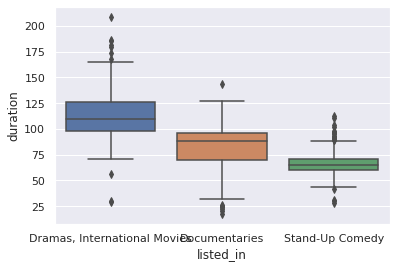

In [ ]:
getBoxplotOfCategories(dataFrame, 'listed_in', 'duration', 3)

In [ ]:
def getHistogram(data_frame, numerical_column):
    df_new = data_frame
    df_new[numerical_column].hist(bins=100)

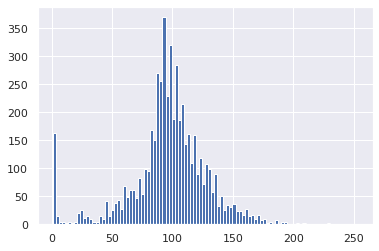

In [ ]:
getHistogram(dataFrame, 'duration')